In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from ipywidgets import *
from helper import BCELoss, generate_data

In [2]:
X,y = generate_data()
x_min = X[:,0].min(); x_max = X[:,0].max()
x_plot = np.linspace(x_min, x_max, 100)

In den vorherigen Tutorials haben wir uns genau angeschaut, was ein neuronales Netz eigentlich macht und wie es entscheidungen trifft. Mit der spannendsten Frage haben wir uns aber noch gar nicht beschäftigt: wie kommt das neuronale Netz zu diesen Ergebnissen; wie findet es gute Gewichte um genaue Vorhersagen zu treffen? Das wollen wir uns hier anschauen.

## Aufgabe 3 | Maschinelles Lernen [ Fehlerfunktion <i class="fa fa-area-chart" style="font-size:22px"></i>&nbsp;]
___

Wir haben nun passende Werte für die Gewichte $w_1$ und $w_2$ unseres Neurons durch geschicktes Ausprobieren gefunden.
Doch wie soll ein Computer die besten Gewichte finden?

Diese Frage bringt uns zum Konzept der **Fehlerfunktion <i class="fa fa-area-chart" style="font-size:16px"></i>**, der wir das mathematische Symbol $\mathcal{L}$ geben (Englisch: loss function).
Diese berechnet, wie ihr Name schon verrät, den Verlust, der durch die aktuellen Gewichte $w_1$ und $w_2$ zustande kommt.  

__In ihrer einfachsten Form zählt sie auf, wie viele Punkte falsch klassifiziert wurden.__
Dies können wir uns am besten veranschaulichen, wenn wir eines der Gewichte konstant halten und $\mathcal{L}$ in Abhängigkeit vom verbliebenen Gewicht aufzeichnen. 
Hierzu wählen wir $w_2=-1$.

<i class="fa fa-laptop" style="font-size:38px"></i> &nbsp;
Verändere in der Abbildung unten den Wert des Gewichts $w_1$, bis alle Punkte richtig klassifiziert sind.
Erforsche auch Regionen, in denen die Klassifikation nicht gut funktioniert.
Erinnert dich der grobe Verlauf der Fehlerfunktion $\mathcal{L}(w_1)$ an eine Funktion, die du aus dem Mathematikunterricht kennst?

In [3]:
w_1 = 0
w_2 = -.5
W = np.array([[w_1, w_2]])
x_1 = X[:,0]

In [4]:
output = X.dot(W.T)
y_pred = (1 / (1 + np.exp(-output)) > 0.5).astype("int")
loss = BCELoss(y, y_pred.squeeze())

interactive(children=(FloatSlider(value=0.0, description='w_1', max=5.0, min=-5.0), Output()), _dom_classes=('…

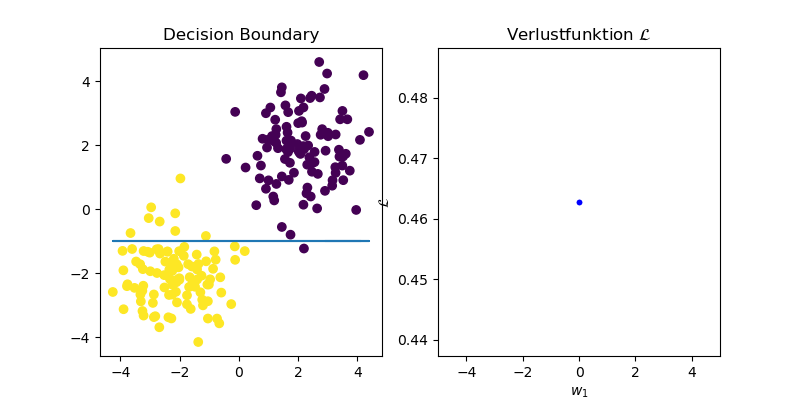

In [5]:
%matplotlib widget

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax.set_title("Decision Boundary")
ax2.set_xlabel("$w_1$")
ax2.set_ylabel("$\mathcal{L}$")
ax2.set_title("Verlustfunktion $\mathcal{L}$")

ax2.set_xlim((-5,5))
ax2.plot(w_1, loss, color="blue", marker=".")

s = ax.scatter(X[:,0], X[:,1], c=y)
line, = ax.plot(x_1, x_1 * -(w_1 / w_2) + (0.5 / w_2))


def update(w_1 = 0.0):
    
    w_1 = round(w_1, 3)
    W = np.array([[w_1, w_2]])
    # calc loss
    output = X.dot(W.T)
    y_pred = (1 / (1 + np.exp(-output)) > 0.5).astype("int")
    loss = BCELoss(y, y_pred.squeeze())
    # draw loss
    ax2.plot(w_1, loss, color="blue", marker=".")
    # draw new decision boundary
    line.set_ydata(x_1 * -(w_1 / w_2) + (0.5 / w_2))
    
    fig.canvas.draw_idle()

interact(update, w_1 = (-5,5,0.1));

# Automatisches Lernen der Gewicht

Das Erkunden der Verlustfunktion wie ihr es oben gemacht habt, ist nicht sehr effizient, da sämtliche Parameterkombinationen durchgespielt werden müssten. Für das Beispiel oben war das zwar ok, aber Neuronale Netze haben schnell millionen von Parametern. 

Zum Glück gibt es eine einfache Methode, zu einem Minimum der Verlustfunktion gelangen, nämlich den sog. Gradientenabstieg (Gradient Descent). Hier wird mittels des Gradienten (mathematische Ableitung einer Funktion in $n$ Dimensionen) der Verlustfunktion jene Veränderung der Parameter ermittelt, welche die größte Verringerung bewirkt. 

Die folgende Grafik veranschaulicht diesen Prozess:

<img src="../Gradient Descent.png" width="600"/>